## Analyse av sammenhenger mellom vær og luftkvalitet

*Resultatet viser sammenhengen mellom graden av temperatur og O3 og graden av vindhastighet og NO2.*

**Korrelasjonsanalyse:**

Korrelasjonskoeffisenten ble beregenet med Pearson-metoden:
- Korrelasjon temp og O3 = 0,315
- Korrelasjon vindhastighet og NO2 = -0,56

En korrelasjon på 0,315 tilsier en moderat positiv sammenheng mellom temperatur og ozon-nivå. Funnet tilsier at ozon dannes lettere på varme dager - noe som kan ha konsekvenser for luftkvalitet.

En korrelasjon på -0,56 tilsier en moderat til sterk negativ sammenheng. Funnet tilsier at vind bidrar til å spre forurensning (spesielt NO2) og det er derfor lavere konsentrasjoner lokalet ved høy vindhastighet. 

**Visualisering:**


Scatterplottet viser korrelassjonsfunnene visuelt:
- Scatterplottet for temperatur og ozon viser en tendens til høyere ozon-nivå ved høyere temperatur. 
- Scatterplottet for vindhastighet og NO2 viser en negativ trend hvor høyere vind gir lavere NO2. 


      Temperatur   Verdi_O3
0           25.8  38.750000
1           25.6  46.554167
2           24.7  47.904167
3           24.5  50.766667
4           24.1  53.200000
...          ...        ...
2460       -13.6  21.062500
2461       -13.8  59.408270
2462       -14.0  25.820833
2463       -14.1  59.841476
2464       -15.7  59.812595

[2465 rows x 2 columns]
      Vindhastighet  Verdi_NO2
0               6.2  14.058333
1               6.2  12.108333
2               6.2  12.650000
3               6.1  29.375000
4               6.1  13.650000
...             ...        ...
2460            0.6  62.052577
2461            0.6  78.366667
2462            0.6  78.195833
2463            0.6  88.712500
2464            0.6  48.716667

[2465 rows x 2 columns]
Korrelasjon mellom Temperatur og Verdi_O3: 0.3152867638469338
Korrelasjon mellom Vindhastighet og Verdi_NO2: -0.5601364794153099


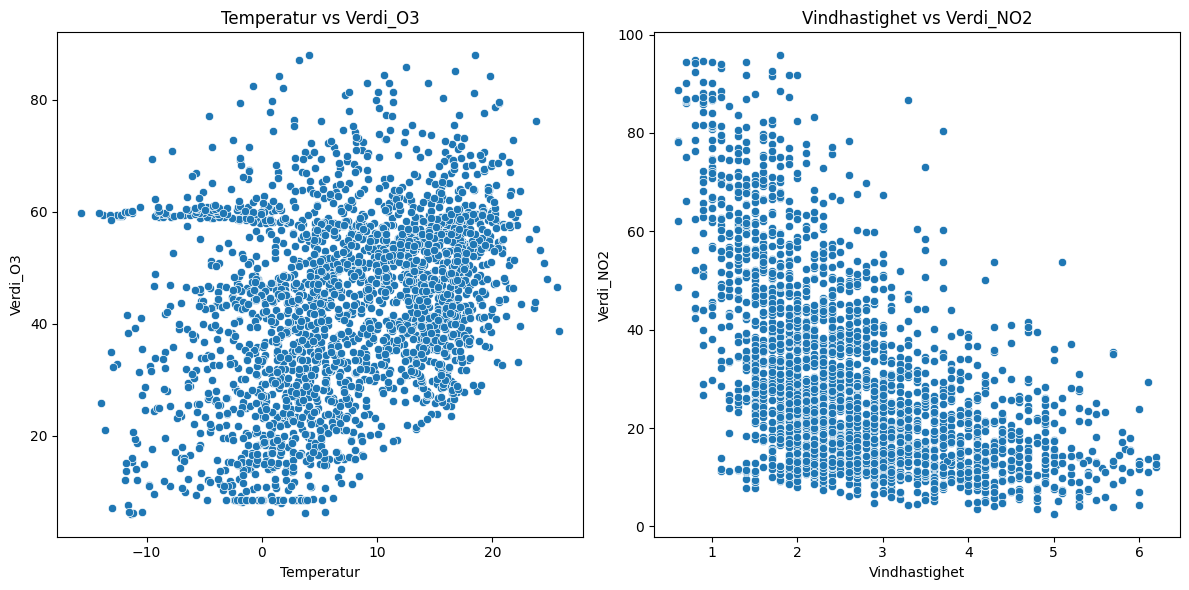

(      Temperatur   Verdi_O3
0           25.8  38.750000
1           25.6  46.554167
2           24.7  47.904167
3           24.5  50.766667
4           24.1  53.200000
...          ...        ...
2460       -13.6  21.062500
2461       -13.8  59.408270
2462       -14.0  25.820833
2463       -14.1  59.841476
2464       -15.7  59.812595

[2465 rows x 2 columns],       Vindhastighet  Verdi_NO2
0               6.2  14.058333
1               6.2  12.108333
2               6.2  12.650000
3               6.1  29.375000
4               6.1  13.650000
...             ...        ...
2460            0.6  62.052577
2461            0.6  78.366667
2462            0.6  78.195833
2463            0.6  88.712500
2464            0.6  48.716667

[2465 rows x 2 columns], np.float64(0.3152867638469338), np.float64(-0.5601364794153099))


In [ ]:
def analyze_correlation_between_weather_and_air_quality(
        df1, df2, date, weather1, airquality1, weather2, airquality2
):
    """
    Fletter sammen vær- og luftkvalitetsdata på dato, og analyserer Pearson-korrelasjonen mellom to par av variabler.
    Resultatene visualiseres med scatter plots og korrelasjonskoeffisientene beregnes.

    Args:
        df1 (pd.DataFrame): DataFrame med værdata.
        df2 (pd.DataFrame): DataFrame med luftkvalitetsdata.
        date (str): Kolonnenavn for dato.
        weather1 (str): Kolonnenavn for første værparameter.
        airquality1 (str): Kolonnenavn for første luftkvalitetsparameter.
        weather2 (str): Kolonnenavn for andre værparameter.
        airquality2 (str): Kolonnenavn for andre luftkvalitetsparameter.
    
    Returns:
        tuple: Resultater fra SQL-spørringer og korrelasjonsberegninger.
    """
    
    # Merge DataFrames på dato
    merged_df = pd.merge(df1, df2, on=date, how="inner")  

    # SQL-spørring for å undersøke sammenhengen mellom første par 
    query1 = f"""
    SELECT {weather1}, {airquality1}
    FROM merged_df
    WHERE {weather1} IS NOT NULL AND {airquality1} IS NOT NULL
    ORDER BY {weather1} DESC
    """
    result1 = psql.sqldf(query1, locals())
    print(result1)

    # SQL-spørring for å undersøke sammenhengen mellom andre par 
    query2 = f"""
    SELECT {weather2}, {airquality2}
    FROM merged_df
    WHERE {weather2} IS NOT NULL AND {airquality2} IS NOT NULL
    ORDER BY {weather2} DESC
    """
    result2 = psql.sqldf(query2, locals())
    print(result2)

    # Pearson-korrelasjon
    # Lager ny df med relevante kolonner og dropper NaN-verdier
    df_analyse = merged_df[[weather1, airquality1, weather2, airquality2]].dropna()
    # Beregner korrelasjonene
    korrelasjon_1= df_analyse[weather1].corr(df_analyse[airquality1], method='pearson')
    korrelasjon_2 = df_analyse[weather2].corr(df_analyse[airquality2], method='pearson')

    print(f"Korrelasjon mellom {weather1} og {airquality1}: {korrelasjon_1}")
    print(f"Korrelasjon mellom {weather2} og {airquality2}: {korrelasjon_2}")


    #Visualisering av korrelasjonen 
    plt.figure(figsize = (12, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x = weather1, y = airquality1, data = df_analyse)
    plt.title(f"{weather1} vs {airquality1}")
    plt.xlabel(f"{weather1}")
    plt.ylabel(f"{airquality1}")

    plt.subplot(1, 2, 2)
    sns.scatterplot(x = weather2, y = airquality2, data = df_analyse)
    plt.title(f"{weather2} vs {airquality2}")
    plt.xlabel(f"{weather2}")
    plt.ylabel(f"{airquality2}")

    plt.tight_layout()
    plt.show()

    return result1, result2, korrelasjon_1, korrelasjon_2

def analyze_frost_nilu():
    """
    Leser inn rengjorte værdata fra frostAPI og luftkvalitetsdata fra niluAPI, og
    analyserer korrelasjonen mellom værdata og luftkvalitetsdata ved å kalle den generelle 
    funksjonen "analyze_correlation_between_weather_and_air_quality".

    Returns:
        tuple: Resultater fra SQL-spørringer og korrelasjonsberegninger.
    """
    
    with open("../data/clean_data/frostAPI_clean_data.json", "r") as frost_file, \
         open("../data/clean_data/niluAPI_clean_data.json", "r") as nilu_file:
        data_frost = json.load(frost_file)
        data_nilu = json.load(nilu_file)
    df_frost = pd.json_normalize(data_frost)
    df_nilu = pd.json_normalize(data_nilu)

    return analyze_correlation_between_weather_and_air_quality(
        df_frost, df_nilu,
        date="Dato",
        weather1="Temperatur",
        airquality1="Verdi_O3",
        weather2="Vindhastighet",
        airquality2="Verdi_NO2"
    )

result = analyze_frost_nilu()
print(result)